In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.preprocessing import OneHotEncoder

In [2]:
df_cfpdss = pd.read_csv(
    "C:/Users/HP/Desktop/github-aditya0by0/stream-viz/data/cfpdss.csv"
)
df_cfpdss.head()

,c5,c6,c7,c8,c9,n0,n1,n2,n3,n4,class
0,a,a,b,a,a,0.448573,1.212644,2.555515,0.242702,0.697604,A
1,a,a,a,b,b,1.902515,-0.467349,-0.744523,-0.017156,-0.380288,A
2,a,a,a,b,b,0.825045,1.002267,1.972207,-0.790095,0.233456,B
3,a,a,a,b,b,-0.124974,0.902601,1.696092,-0.320182,0.243261,A
4,b,a,a,b,a,-1.259765,0.793134,1.547527,-2.132172,-0.788367,B


In [3]:
df_cfpdss.shape

(13000, 11)

In [4]:
X_df = df_cfpdss.drop(columns="class")
y_df = df_cfpdss[["class"]]
X_df.head()

,c5,c6,c7,c8,c9,n0,n1,n2,n3,n4
0,a,a,b,a,a,0.448573,1.212644,2.555515,0.242702,0.697604
1,a,a,a,b,b,1.902515,-0.467349,-0.744523,-0.017156,-0.380288
2,a,a,a,b,b,0.825045,1.002267,1.972207,-0.790095,0.233456
3,a,a,a,b,b,-0.124974,0.902601,1.696092,-0.320182,0.243261
4,b,a,a,b,a,-1.259765,0.793134,1.547527,-2.132172,-0.788367


In [5]:
categorical_columns = X_df.select_dtypes(include=["object"]).columns.tolist()
print(f"categorical_columns : {categorical_columns}")
X_df_categorical = X_df[categorical_columns]
X_df_categorical.head()

categorical_columns : ['c5', 'c6', 'c7', 'c8', 'c9']


,c5,c6,c7,c8,c9
0,a,a,b,a,a
1,a,a,a,b,b
2,a,a,a,b,b
3,a,a,a,b,b
4,b,a,a,b,a


In [6]:
X_df_categorical.values.shape

(13000, 5)

In [7]:
encoder = OneHotEncoder(sparse_output=False, drop="if_binary", dtype=np.int32)
one_hot_encoded = encoder.fit_transform(X_df_categorical)
one_hot_encoded
columns = encoder.get_feature_names_out()
X_df_cat_one_hot = pd.DataFrame(one_hot_encoded, columns=columns)

X_df_cat_one_hot.head()

,c5_b,c6_b,c7_b,c8_b,c9_b
0,0,0,1,0,0
1,0,0,0,1,1
2,0,0,0,1,1
3,0,0,0,1,1
4,1,0,0,1,0


In [8]:
y_encoder = OneHotEncoder(sparse_output=False, drop="if_binary", dtype=np.int32)
y_encoded = y_encoder.fit_transform(y_df)
y_df_one_hot = pd.DataFrame(y_encoded, columns=y_encoder.get_feature_names_out())
y_df_one_hot.head()

,class_B
0,0
1,0
2,1
3,0
4,1


In [9]:
chi2_stats, p_values = chi2(X_df_cat_one_hot, y_df_one_hot)
print(f"chi2_stats: {chi2_stats}")
print(f"p_values : {p_values}")

chi2_stats: [1.83909709e+01 2.79311622e-01 3.53484032e+01 4.31556729e+02
 5.11852937e+01]
p_values : [1.79908475e-05 5.97152760e-01 2.75694501e-09 7.44847902e-96
 8.40459200e-13]


In [10]:
chi2_selector = SelectKBest(score_func=chi2, k=2)
X_new = chi2_selector.fit_transform(X_df_cat_one_hot, y_df_one_hot)
selected_features = X_df_cat_one_hot.columns[chi2_selector.get_support()]

print("Selected Features:", selected_features.tolist())

Selected Features: ['c8_b', 'c9_b']


In [12]:
X_df_encoded = pd.concat(
    [
        X_df_cat_one_hot,
        X_df[[col for col in X_df.columns if col not in categorical_columns]],
    ],
    axis=1,
)
X_df_encoded.head()

,c5_b,c6_b,c7_b,c8_b,c9_b,n0,n1,n2,n3,n4
0,0,0,1,0,0,0.448573,1.212644,2.555515,0.242702,0.697604
1,0,0,0,1,1,1.902515,-0.467349,-0.744523,-0.017156,-0.380288
2,0,0,0,1,1,0.825045,1.002267,1.972207,-0.790095,0.233456
3,0,0,0,1,1,-0.124974,0.902601,1.696092,-0.320182,0.243261
4,1,0,0,1,0,-1.259765,0.793134,1.547527,-2.132172,-0.788367


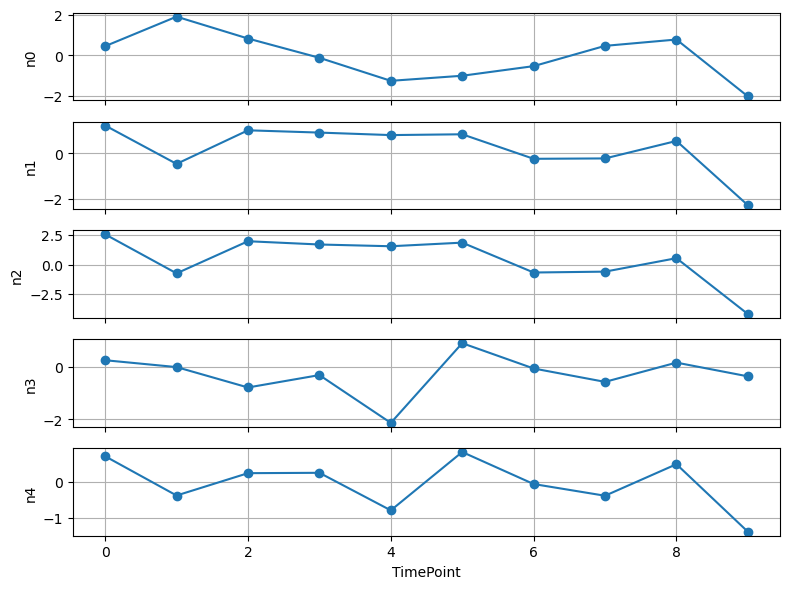

In [15]:
from StreamVisualization import StreamVisualization

stream_ = StreamVisualization(X_df_encoded.iloc[:, 5:], y_df_one_hot)
stream_.plot()